In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import yfinance as yf

In [2]:
start = '2012-01-01'
end = '2024-11-05'
stock = '^NSEI'

data = yf.download(stock, start, end)

[*********************100%***********************]  1 of 1 completed


In [3]:
data.reset_index(inplace=True)

In [4]:
data

Price,Date,Adj Close,Close,High,Low,Open,Volume
Ticker,,^NSEI,^NSEI,^NSEI,^NSEI,^NSEI,^NSEI
0,2012-01-03 00:00:00+00:00,4765.299805,4765.299805,4773.100098,4675.799805,4675.799805,0
1,2012-01-04 00:00:00+00:00,4749.649902,4749.649902,4782.850098,4728.850098,4774.950195,0
2,2012-01-05 00:00:00+00:00,4749.950195,4749.950195,4779.799805,4730.149902,4749.000000,0
3,2012-01-06 00:00:00+00:00,4754.100098,4754.100098,4794.899902,4686.850098,4724.149902,0
4,2012-01-09 00:00:00+00:00,4742.799805,4742.799805,4758.700195,4695.450195,4747.549805,0
...,...,...,...,...,...,...,...
3145,2024-10-29 00:00:00+00:00,24466.849609,24466.849609,24484.500000,24140.849609,24328.849609,332000
3146,2024-10-30 00:00:00+00:00,24340.849609,24340.849609,24498.199219,24307.300781,24371.449219,285200
3147,2024-10-31 00:00:00+00:00,24205.349609,24205.349609,24372.449219,24172.599609,24349.849609,287000


In [5]:
ma_100_days = data.Close.rolling(100).mean()

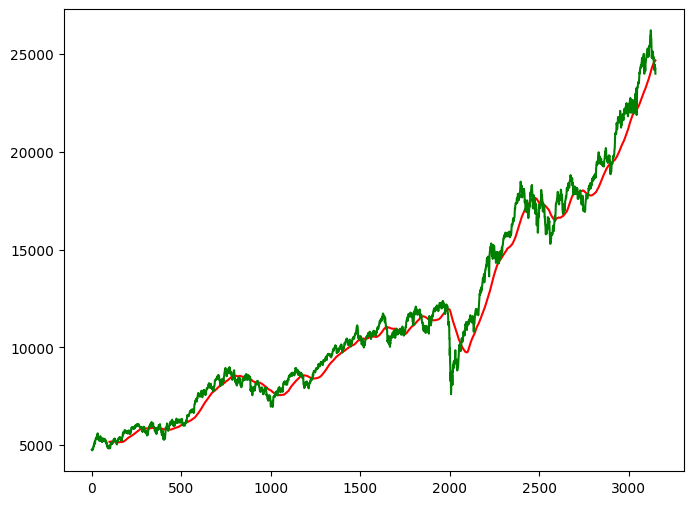

In [6]:
plt.figure(figsize=(8,6))
plt.plot(ma_100_days, 'r')
plt.plot(data.Close, 'g')
plt.show()

In [7]:
ma_200_days = data.Close.rolling(200).mean()

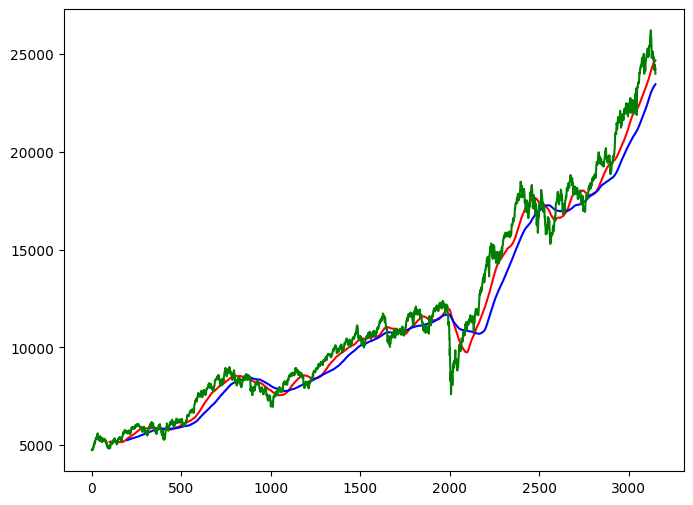

In [8]:
plt.figure(figsize=(8,6))
plt.plot(ma_100_days, 'r')
plt.plot(ma_200_days,'b')
plt.plot(data.Close,'g')
plt.show()

In [9]:
data.dropna(inplace=True)

In [10]:
data_train = pd.DataFrame(data.Close[0: int(len(data)*0.80)])
data_test = pd.DataFrame(data.Close[int(len(data)*0.80): len(data)])

In [11]:
data_train.shape[0]

2520

In [12]:
data_test.shape[0]

630

In [13]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0,1))

In [14]:
data_train_scale = scaler.fit_transform(data_train)

In [15]:
x = []
y = []

for i in range(100, data_train_scale.shape[0]):
    x.append(data_train_scale[i-100:i])
    y.append(data_train_scale[i,0])
    

In [16]:
x, y = np.array(x), np.array(y)

In [17]:
from keras.layers import Dense, Dropout, LSTM
from keras.models import Sequential

In [18]:
model = Sequential()
model.add(LSTM(units = 50, activation = 'relu', return_sequences = True,
               input_shape = ((x.shape[1],1))))
model.add(Dropout(0.2))

model.add(LSTM(units = 60, activation='relu', return_sequences = True))
model.add(Dropout(0.3))

model.add(LSTM(units = 80, activation = 'relu', return_sequences = True))
model.add(Dropout(0.4))

model.add(LSTM(units = 120, activation = 'relu'))
model.add(Dropout(0.5))

model.add(Dense(units =1))

c:\Users\gamin\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [19]:
model.compile(optimizer = 'adam', loss = 'mean_squared_error')

In [20]:
model.fit(x,y, epochs = 50, batch_size =32, verbose =1)

Epoch 1/50
76/76 ━━━━━━━━━━━━━━━━━━━━ 9s 69ms/step - loss: 0.0616
Epoch 2/50
76/76 ━━━━━━━━━━━━━━━━━━━━ 5s 64ms/step - loss: 0.0083
Epoch 3/50
76/76 ━━━━━━━━━━━━━━━━━━━━ 5s 64ms/step - loss: 0.0075
Epoch 4/50
76/76 ━━━━━━━━━━━━━━━━━━━━ 5s 64ms/step - loss: 0.0059
Epoch 5/50
76/76 ━━━━━━━━━━━━━━━━━━━━ 5s 64ms/step - loss: 0.0054
Epoch 6/50
76/76 ━━━━━━━━━━━━━━━━━━━━ 5s 63ms/step - loss: 0.0055
Epoch 7/50
76/76 ━━━━━━━━━━━━━━━━━━━━ 5s 63ms/step - loss: 0.0049
Epoch 8/50
76/76 ━━━━━━━━━━━━━━━━━━━━ 5s 71ms/step - loss: 0.0036
Epoch 9/50
76/76 ━━━━━━━━━━━━━━━━━━━━ 9s 113ms/step - loss: 0.0051
Epoch 10/50
76/76 ━━━━━━━━━━━━━━━━━━━━ 8s 112ms/step - loss: 0.0035
Epoch 11/50
76/76 ━━━━━━━━━━━━━━━━━━━━ 9s 113ms/step - loss: 0.0034
Epoch 12/50
76/76 ━━━━━━━━━━━━━━━━━━━━ 8s 111ms/step - loss: 0.0036
Epoch 13/50
76/76 ━━━━━━━━━━━━━━━━━━━━ 9s 113ms/step - loss: 0.0037
Epoch 14/50
76/76 ━━━━━━━━━━━━━━━━━━━━ 9s 113ms/step - loss: 0.0031
Epoch 15/50
76/76 ━━━━━━━━━━━━━━━━━━━━ 9s 115ms/step - loss: 0.00

In [21]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                     │ (None, 100, 50)        │        10,400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 100, 50)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_1 (LSTM)                   │ (None, 100, 60)        │        26,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 100, 60)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_2 (LSTM)                   │ (None, 100, 80)        │        45,120 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 100, 80)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_3 (LSTM)                   │ (None, 120)            │        96,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 120)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1)              │           121 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 536,285 (2.05 MB)

 Trainable params: 178,761 (698.29 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 357,524 (1.36 MB)

In [22]:
pas_100_days = data_train.tail(100)

In [23]:
data_test = pd.concat([pas_100_days, data_test], ignore_index=True)

In [24]:
data_test_scale  =  scaler.fit_transform(data_test)

In [25]:
x = []
y = []

for i in range(100, data_test_scale.shape[0]):
    x.append(data_test_scale[i-100:i])
    y.append(data_test_scale[i,0])
x, y = np.array(x), np.array(y)

In [26]:
y_predict = model.predict(x)

20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step


In [27]:
scale =1/scaler.scale_

In [28]:
y_predict = y_predict*scale

In [29]:
y = y*scale

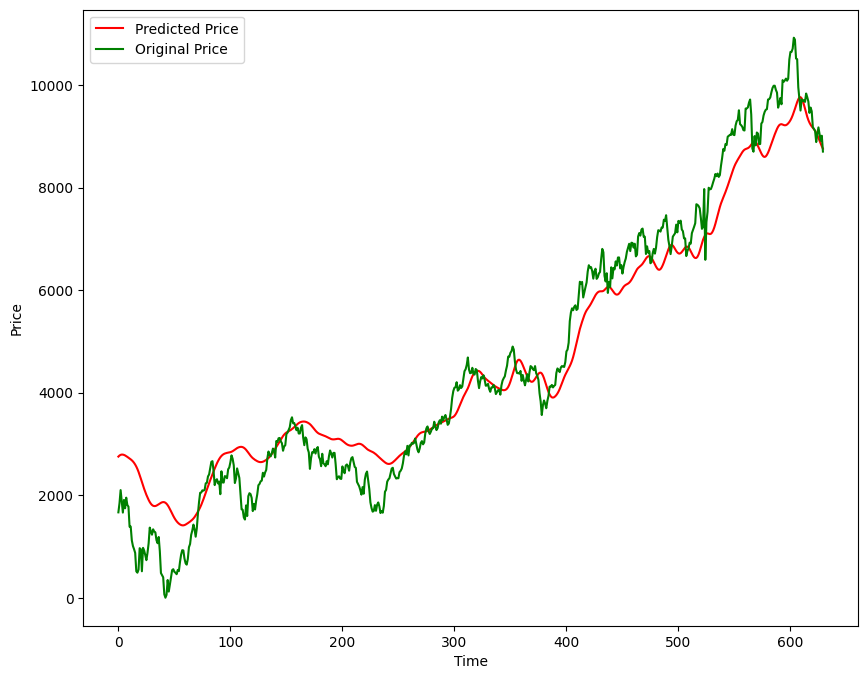

In [30]:
plt.figure(figsize=(10,8))
plt.plot(y_predict, 'r', label = 'Predicted Price')
plt.plot(y, 'g', label = 'Original Price')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.show()

In [31]:
model.save('Stock Predictions Model.keras')